# Emergeny Response Calls Calgary Analysis

For this capstone project we will be analyzing emergency Response form the city of Caglary from 2010 to Nov 2018 . The data contains the following fields:


date	Alarm Year	Alarm Month	Alarm Day	Major Incident Type	Incident Count	id

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

** Import visualization libraries and set %matplotlib inline. **

In [2]:
%matplotlib inline

**Dataset Import

In [3]:
df = pd.read_csv('Fire_Emergency_Response_Calls.csv')

In [4]:
dfc=pd.read_csv('Calgary_Census_Results_1958-2018.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20305 entries, 0 to 20304
Data columns (total 7 columns):
date                   20305 non-null object
Alarm Year             20305 non-null int64
Alarm Month            20305 non-null int64
Alarm Day              20305 non-null int64
Major Incident Type    20305 non-null object
Incident Count         20305 non-null int64
id                     20305 non-null object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 7 columns):
Year         687 non-null object
Ward         684 non-null float64
Dwellings    674 non-null float64
Residents    687 non-null int64
Vehicles     12 non-null float64
Age 65 +     6 non-null float64
Voters       13 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 37.6+ KB


In [7]:
dfc.tail()

,Year,Ward,Dwellings,Residents,Vehicles,Age 65 +,Voters
682,04/01/2018 12:00:00 AM,3.0,23732.0,69877,NaN,NaN,NaN
683,04/01/2018 12:00:00 AM,10.0,32392.0,92891,NaN,NaN,NaN
684,04/01/2018 12:00:00 AM,5.0,27773.0,92694,NaN,NaN,NaN
685,04/01/2018 12:00:00 AM,13.0,32912.0,90220,NaN,NaN,NaN
686,04/01/2018 12:00:00 AM,2.0,31468.0,89475,NaN,NaN,NaN


** Check the head of df **

In [8]:
df.head()

,date,Alarm Year,Alarm Month,Alarm Day,Major Incident Type,Incident Count,id
0,22/04/2010,2010,4,22,Fire,11,2010-04-22Fire
1,26/04/2010,2010,4,26,Medical/Rescue,74,2010-04-26Medical/Rescue
2,30/04/2010,2010,4,30,False Alarm,23,2010-04-30False Alarm
3,10/05/2010,2010,5,10,Fire,8,2010-05-10Fire
4,05/06/2010,2010,6,5,False Alarm,21,2010-06-05False Alarm


In [9]:
df.tail()

,date,Alarm Year,Alarm Month,Alarm Day,Major Incident Type,Incident Count,id
20300,01/08/2017,2017,8,1,Rupture/Explosion,2,2017-08-01Rupture/Explosion
20301,02/08/2017,2017,8,2,False Alarm,23,2017-08-02False Alarm
20302,02/08/2017,2017,8,2,Fire,4,2017-08-02Fire
20303,02/08/2017,2017,8,2,Hazardous Condition,20,2017-08-02Hazardous Condition
20304,02/08/2017,2017,8,2,Investigation,10,2017-08-02Investigation


# Data Cleaning

In [10]:
df=df.sort_values(['Alarm Year','Alarm Month','Alarm Day']).reset_index()

In [11]:
def changeDate(str):
    date= str.split('/')
    date=date[1]+'/'+date[0]+'/'+date[2]
    return date

In [12]:
df['date']=df['date'].apply(changeDate)

In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df2 = df.pivot(index='date',columns='Major Incident Type',values='Incident Count')

In [15]:
df2=df2.fillna(0)

In [16]:
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].apply(lambda x: x.weekday())
df['day']=df['day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

CENSUS Data Frame

In [17]:
dfc['Year']=pd.to_datetime(dfc['Year'])

In [18]:
dfc.index=dfc['Year']

In [19]:
df.index=df['date']

In [20]:
dfc['Year']=dfc['Year'].apply(lambda x: x.year)

## Basic Questions

In [21]:
df['Major Incident Type'].describe()

count              20305
unique                 8
top       Medical/Rescue
freq                3252
Name: Major Incident Type, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [22]:
df.groupby('Major Incident Type').sum()['Incident Count']


Major Incident Type
False Alarm                   77240
Fire                          14880
Hazardous Condition           69093
Investigation                 42261
Medical/Rescue               258905
Public Service Assistance     37134
Rupture/Explosion               561
Severe Weather                 1727
Name: Incident Count, dtype: int64

**Total Incidents

In [23]:
df.groupby('Major Incident Type').sum()['Incident Count'].sum()


501801

In [24]:
df3=df.groupby(by=['date']).sum()

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


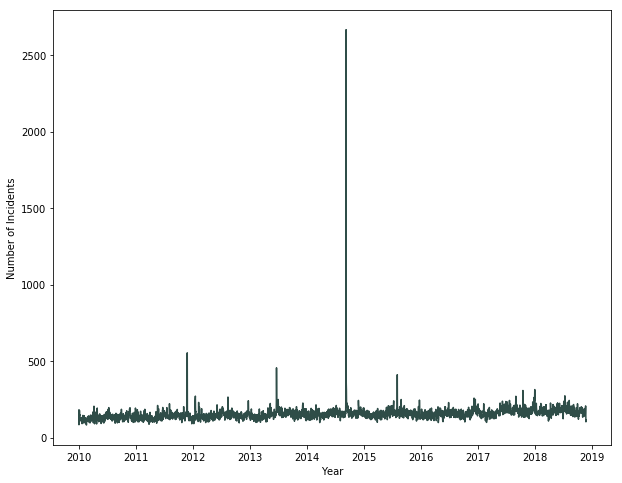

In [25]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot( df3['Incident Count'],color='#2f4d48')
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Year')
plt.savefig('Total_incidents.png',dpi=300)

In [26]:
ranking_date=df3['Incident Count'].sort_values(ascending=False).reset_index()

In [27]:
ranking_date.head(70)

,date,Incident Count
0,2014-09-10,2667
1,2011-11-27,554
2,2013-06-21,456
3,2015-08-04,411
4,2014-09-09,370
5,2014-09-11,356
6,2014-09-12,314
7,2018-01-01,314
8,2017-10-17,308
9,2014-09-08,299


** Average Incident Per day

In [28]:
df3['Incident Count'].mean()

154.30535055350555

**Save dataFrame to excel for Report

In [29]:
writer = pd.ExcelWriter('CRdata.xlsx')

In [30]:
s1=df3[df3['Incident Count']>400]
s1.to_excel(writer,'Sheet1')

In [31]:
s2= df[df['date']==pd.to_datetime('09/10/2014')]
s2.to_excel(writer,'Sheet2')

**2011-11-27 Wind Storm
013-06-21 Flooding calgary
2014-09-10 Snow Storm
2015-08-04 Hail storm 

# Incidents October 2/2018

In [32]:
df4=df[df['date']==pd.to_datetime('10/02/2018')]
df4['Incident Count'].sum()


221

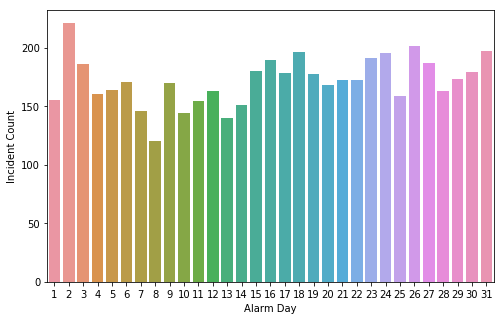

In [64]:
df4=df['2018'][df['2018']['Alarm Month']==10]
fig,ax= plt.subplots(figsize=(8,5))
sns.barplot(x='Alarm Day',y='Incident Count',data=df4,ci=None,estimator=sum,ax=ax)

plt.savefig('October18_Incdents.png',dpi=300)

# Incident by Type

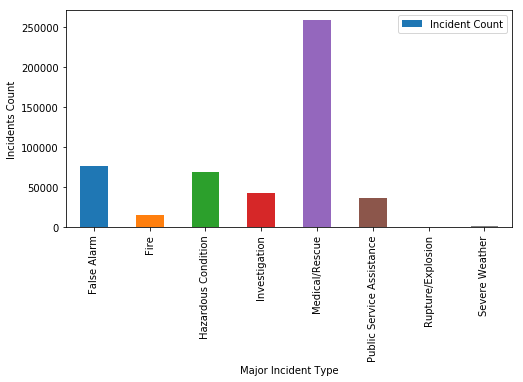

In [35]:
fig,ax = plt.subplots(figsize=(8,4))

df.groupby('Major Incident Type').sum().plot(y='Incident Count',kind='bar',ax=ax)
ax.set_ylabel('Incidents Count')
plt.savefig('incidentsCountByType.png',dpi=300)

In [36]:
incident_count=df.groupby('Major Incident Type').sum().sort_values('Incident Count',ascending=False)

In [37]:
incident_count['Incident Count']['False Alarm']/incident_count['Incident Count'].sum()

0.15392556013240308

In [38]:
dfc1=dfc.loc['2010-1-1 01:00:00':'2018-5-1 01:00:00']

# Census Data Set 

In [39]:
dfc1.head()

,Year,Ward,Dwellings,Residents,Vehicles,Age 65 +,Voters
Year,,,,,,,
2010-04-01,2010,1.0,33122.0,83009,NaN,NaN,NaN
2010-04-01,2010,2.0,24552.0,69961,NaN,NaN,NaN
2010-04-01,2010,3.0,27550.0,85561,NaN,NaN,NaN
2010-04-01,2010,4.0,32816.0,85424,NaN,NaN,NaN
2010-04-01,2010,5.0,25929.0,77506,NaN,NaN,NaN


/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


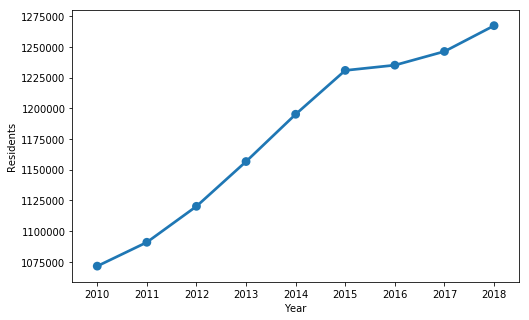

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
sns.pointplot(x='Year',y='Residents',data=dfc1,estimator=sum, ci=0,ax=ax)
plt.savefig('population.png',dpi=300)

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


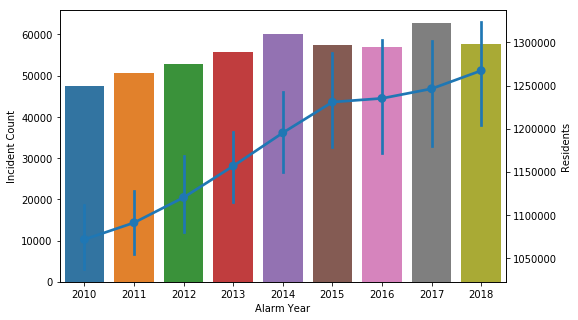

In [41]:
fig,ax=plt.subplots( figsize=(8,5))
sns.barplot(x='Alarm Year',y='Incident Count',data=df,estimator=sum,ax=ax,ci=None)
ax2=ax.twinx()
sns.pointplot(x='Year',y='Residents',data=dfc1,estimator=sum,ax=ax2)
plt.savefig('ResidentsVsIncidents.png',dpi=300)


In [42]:
dfc2=dfc1.groupby('Year').sum()
df5=df.groupby('Alarm Year').sum()

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [43]:
dfmerged=pd.concat([dfc2,df5],axis=1)
correlation = dfmerged['Residents'].corr(dfmerged['Incident Count'])
correlation

0.8685644606770945

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


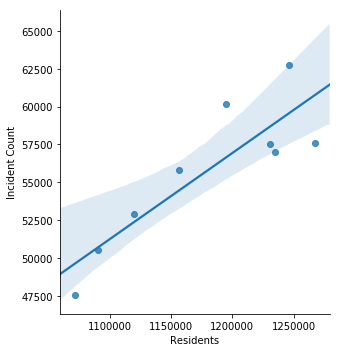

In [66]:

sns.lmplot(y='Incident Count',x='Residents',data=dfmerged)
plt.savefig('Lmplot.png',dpi=300)

In [73]:
dfmerged['Incident Count']

2010    47548
2011    50519
2012    52904
2013    55802
2014    60153
2015    57516
2016    57027
2017    62766
2018    57566
Name: Incident Count, dtype: int64

In [75]:
X = sm.add_constant(dfmerged['Residents'])
result=sm.OLS(dfmerged['Incident Count'],X).fit()
result.summary()


/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Incident Count   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.50
Date:                Tue, 08 Jan 2019   Prob (F-statistic):            0.00238
Time:                        14:50:49   Log-Likelihood:                -82.088
No. Observations:                   9   AIC:                             168.2
Df Residuals:                       7   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.142e+04   1.45e+04     -0.787      0.457   -4.57e+04    2.29e+04
Residents      0.0570      0.012      4.637      0.002       0.028       0.086
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.633
Skew:                           0.285   Prob(JB):                        0.729
Kurtosis:                       1.832   Cond. No.                     2.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


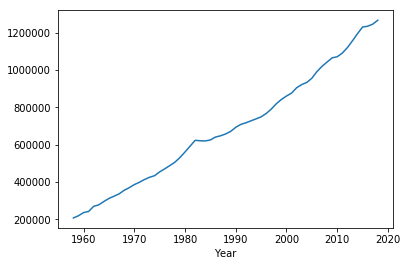

In [46]:
dfc.groupby('Year').sum()['Residents'].plot()

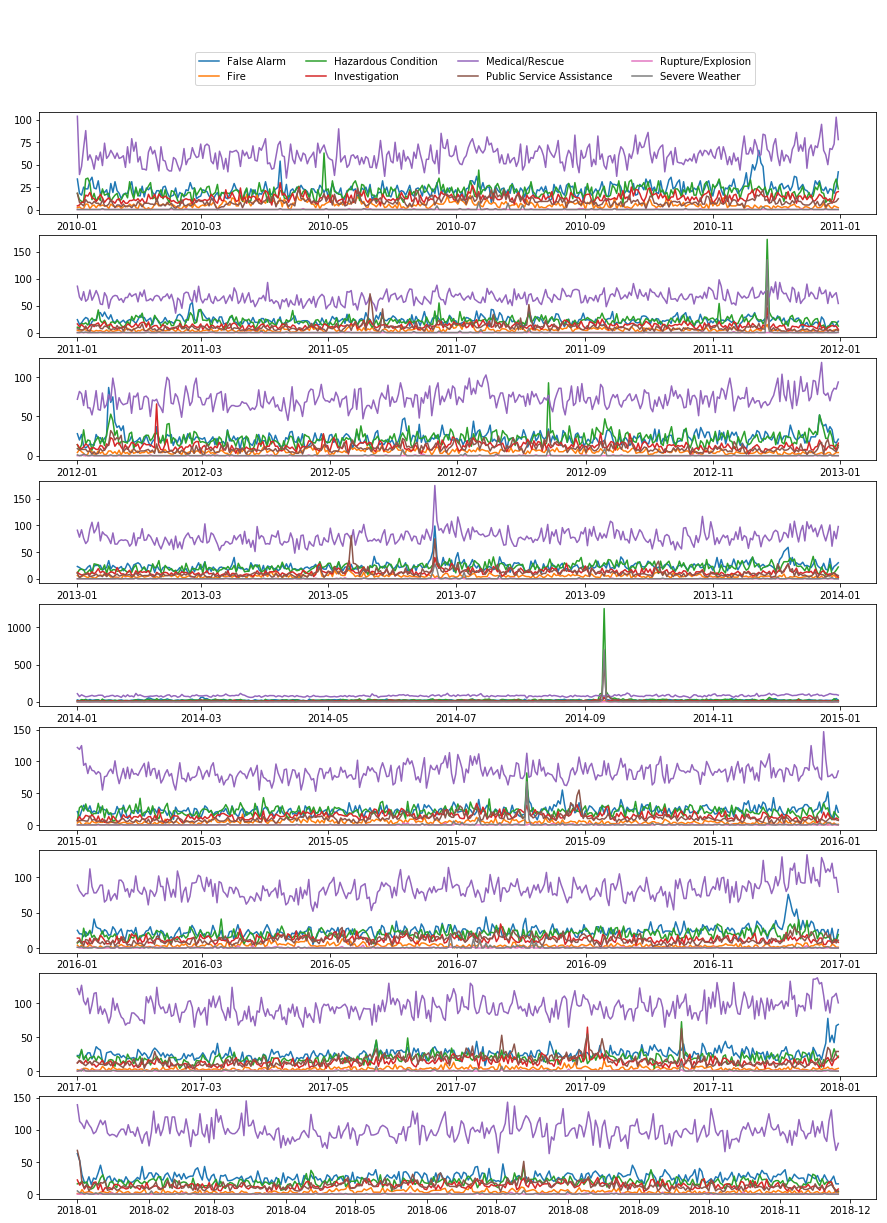

In [47]:
codes=df2.columns
fig,ax =plt.subplots(9,1,figsize=(15,20))
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
for i in range(len(years)):
    ax[i].plot(df2[years[i]])
fig.legend(codes,ncol=4,loc=(0.22,0.93))
fig.savefig('IncidentYear_by_type.png',dpi=300)

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


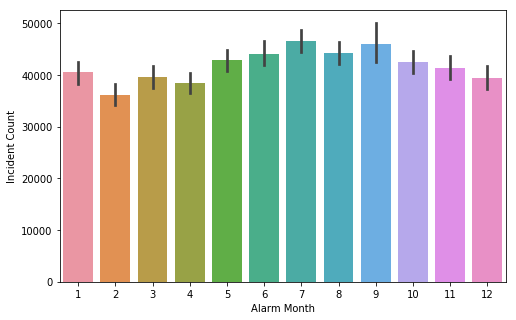

In [48]:
fig,ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Alarm Month',y='Incident Count',data=df,estimator=sum, ax=ax)
plt.savefig('incidentsinMonth.png',dpi=300)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


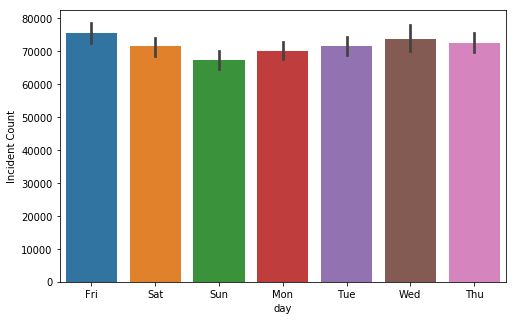

In [49]:
fig,ax = plt.subplots(figsize=(8,5))
sns.barplot(x='day',y='Incident Count',data=df,estimator=sum,ax=ax)
plt.savefig('IncidentDay.png',dpi=300)

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


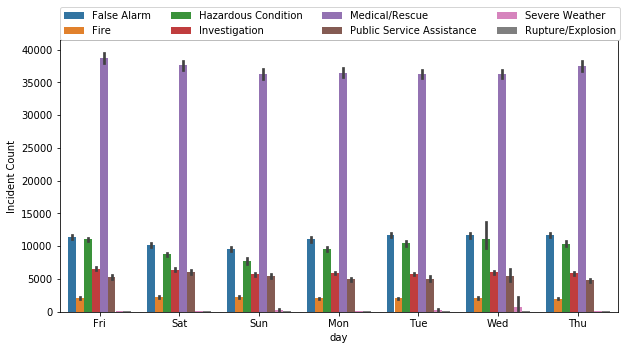

In [50]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='day',y='Incident Count',hue='Major Incident Type',data=df,estimator=sum,ax=ax)
ax.legend(ncol=4,loc=(0,1))
plt.savefig('IncidentDay_by_type.png',dpi=300)

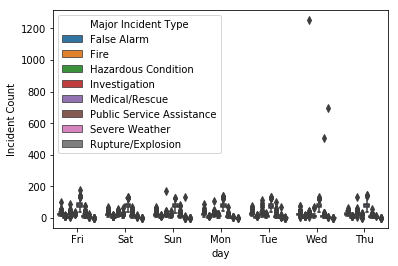

In [51]:
sns.boxplot(x='day',y='Incident Count',hue='Major Incident Type',data=df)

In [52]:
df6=df.drop(index=[pd.to_datetime("09/10/2014")])

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


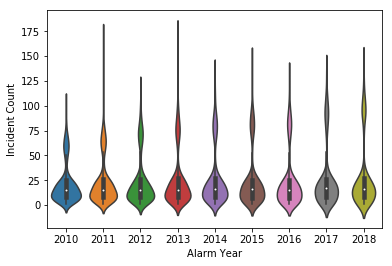

In [53]:
sns.violinplot(x='Alarm Year',y='Incident Count',data=df6)

 each plot representing a Reason for Emergency Response call

In [54]:

df2=df2.drop(index=[pd.to_datetime("09/10/2014")])

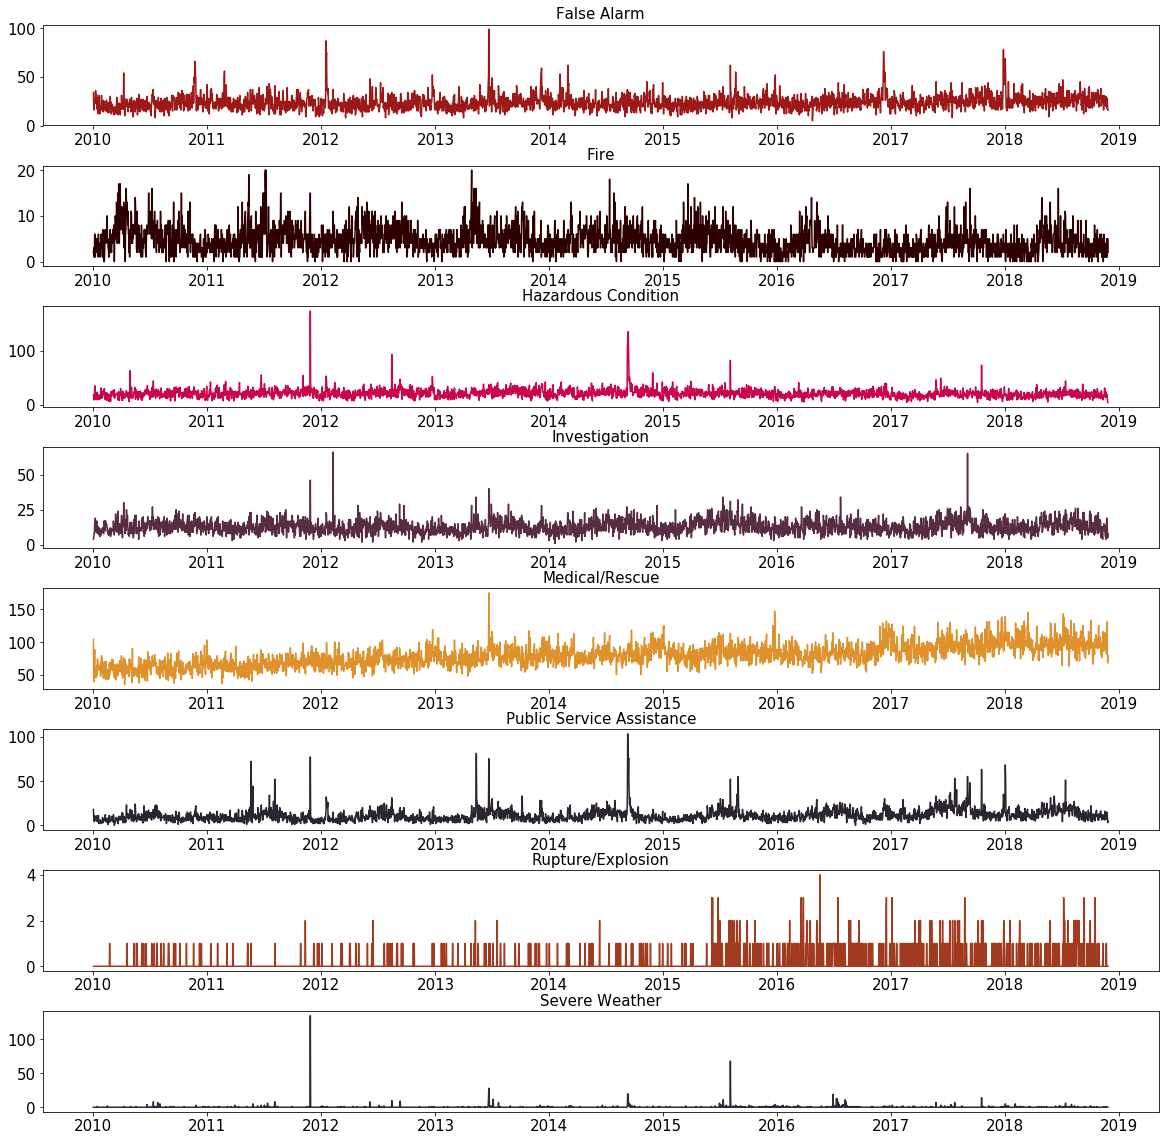

In [87]:
fig,ax=plt.subplots(len(codes),1,figsize=(20,20))
color=['#9f1818','#2f0000','#ca054d','#582d43','#df912b','#2b2531','#a23a1f','#282c37','#fdcc6d']
for i in range(len(codes)):
    ax[i].plot(df2[codes[i]],color=color[i])
    ax[i].set_title(codes[i], fontsize=15)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.savefig('AllIncidentbytype.png',dpi=300)

In [56]:
df7=df.groupby(by=['day','Alarm Month']).sum()['Incident Count'].unstack()
df7.head()
df7.to_excel(writer,'Sheet3')
writer.save()

In [57]:
df8=df6.groupby(by=['day','Alarm Month']).sum()['Incident Count'].unstack()

In [58]:
df9=df6.groupby(by=['Alarm Year','Alarm Month']).sum()['Incident Count'].unstack()

** Now create a HeatMap using this new DataFrame. **

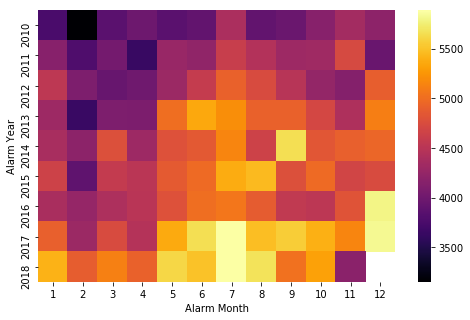

In [59]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(df9,cmap='inferno')
plt.savefig('heatmapMonth.png',dpi=300)

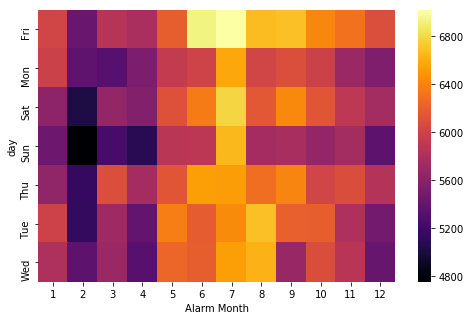

In [60]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(df8,cmap='inferno')
plt.savefig('heatmapDay.png',dpi=300)

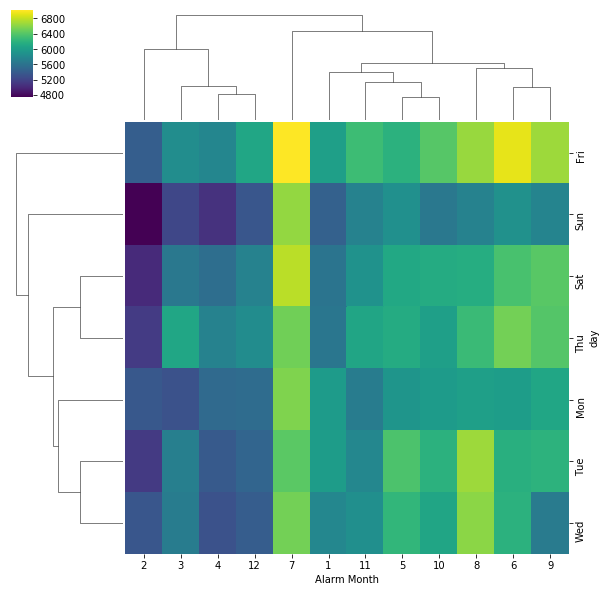

In [61]:
sns.clustermap(df8,cmap='viridis')